In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
data = pd.read_csv('solarpowergeneration.csv')
data

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [3]:
data.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [4]:
data.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [5]:
data.shape

(2920, 10)

In [6]:
data.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [8]:
data.describe(include='all')

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [9]:
data.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [10]:
# Handeling missing values
mean = data['average-wind-speed-(period)'].mean()

In [11]:
data['average-wind-speed-(period)'].fillna(mean,inplace=True)

In [12]:
data.isna().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [13]:
duplicates = data[data.duplicated()]
duplicates.sum()

distance-to-solar-noon         0.0
temperature                    0.0
wind-direction                 0.0
wind-speed                     0.0
sky-cover                      0.0
visibility                     0.0
humidity                       0.0
average-wind-speed-(period)    0.0
average-pressure-(period)      0.0
power-generated                0.0
dtype: float64

# Visualization

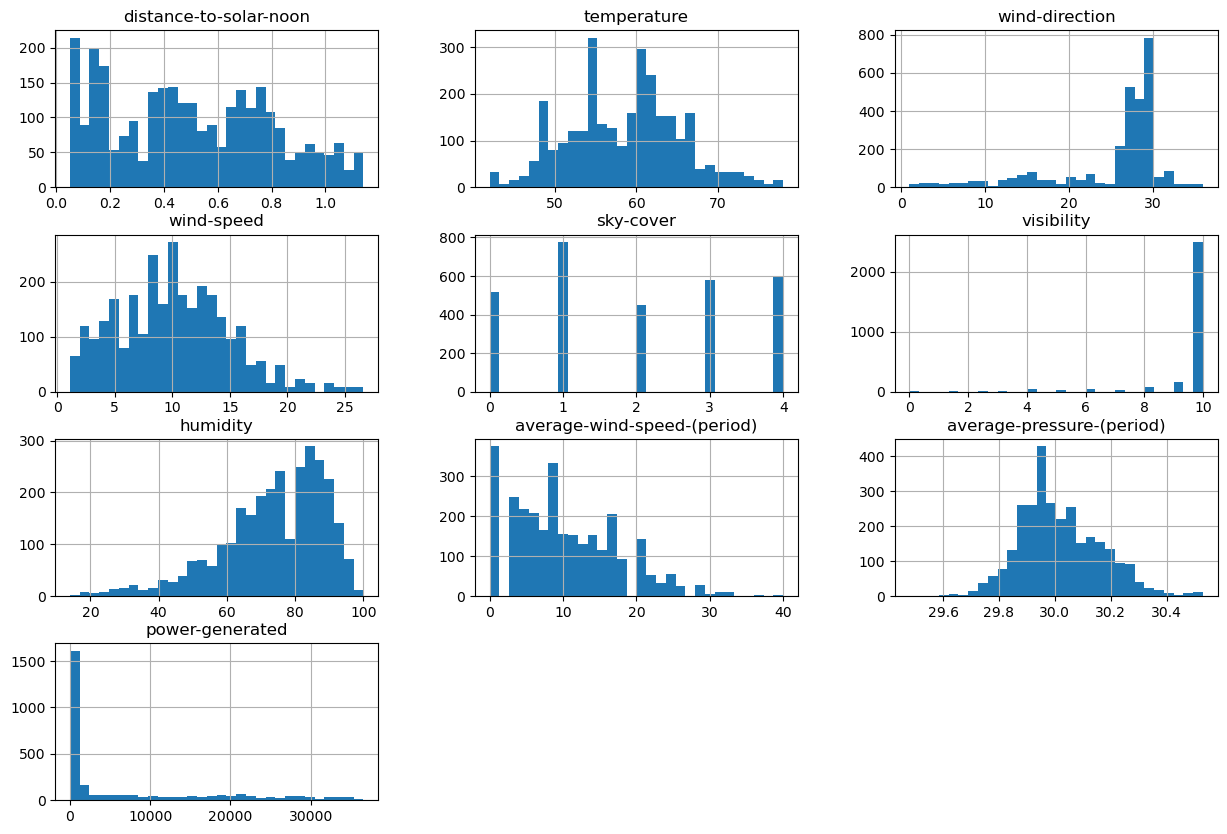

In [13]:
# Histogram
data.hist(bins=30, figsize=(15,10))
plt.show()

C:\Users\Gowardhan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


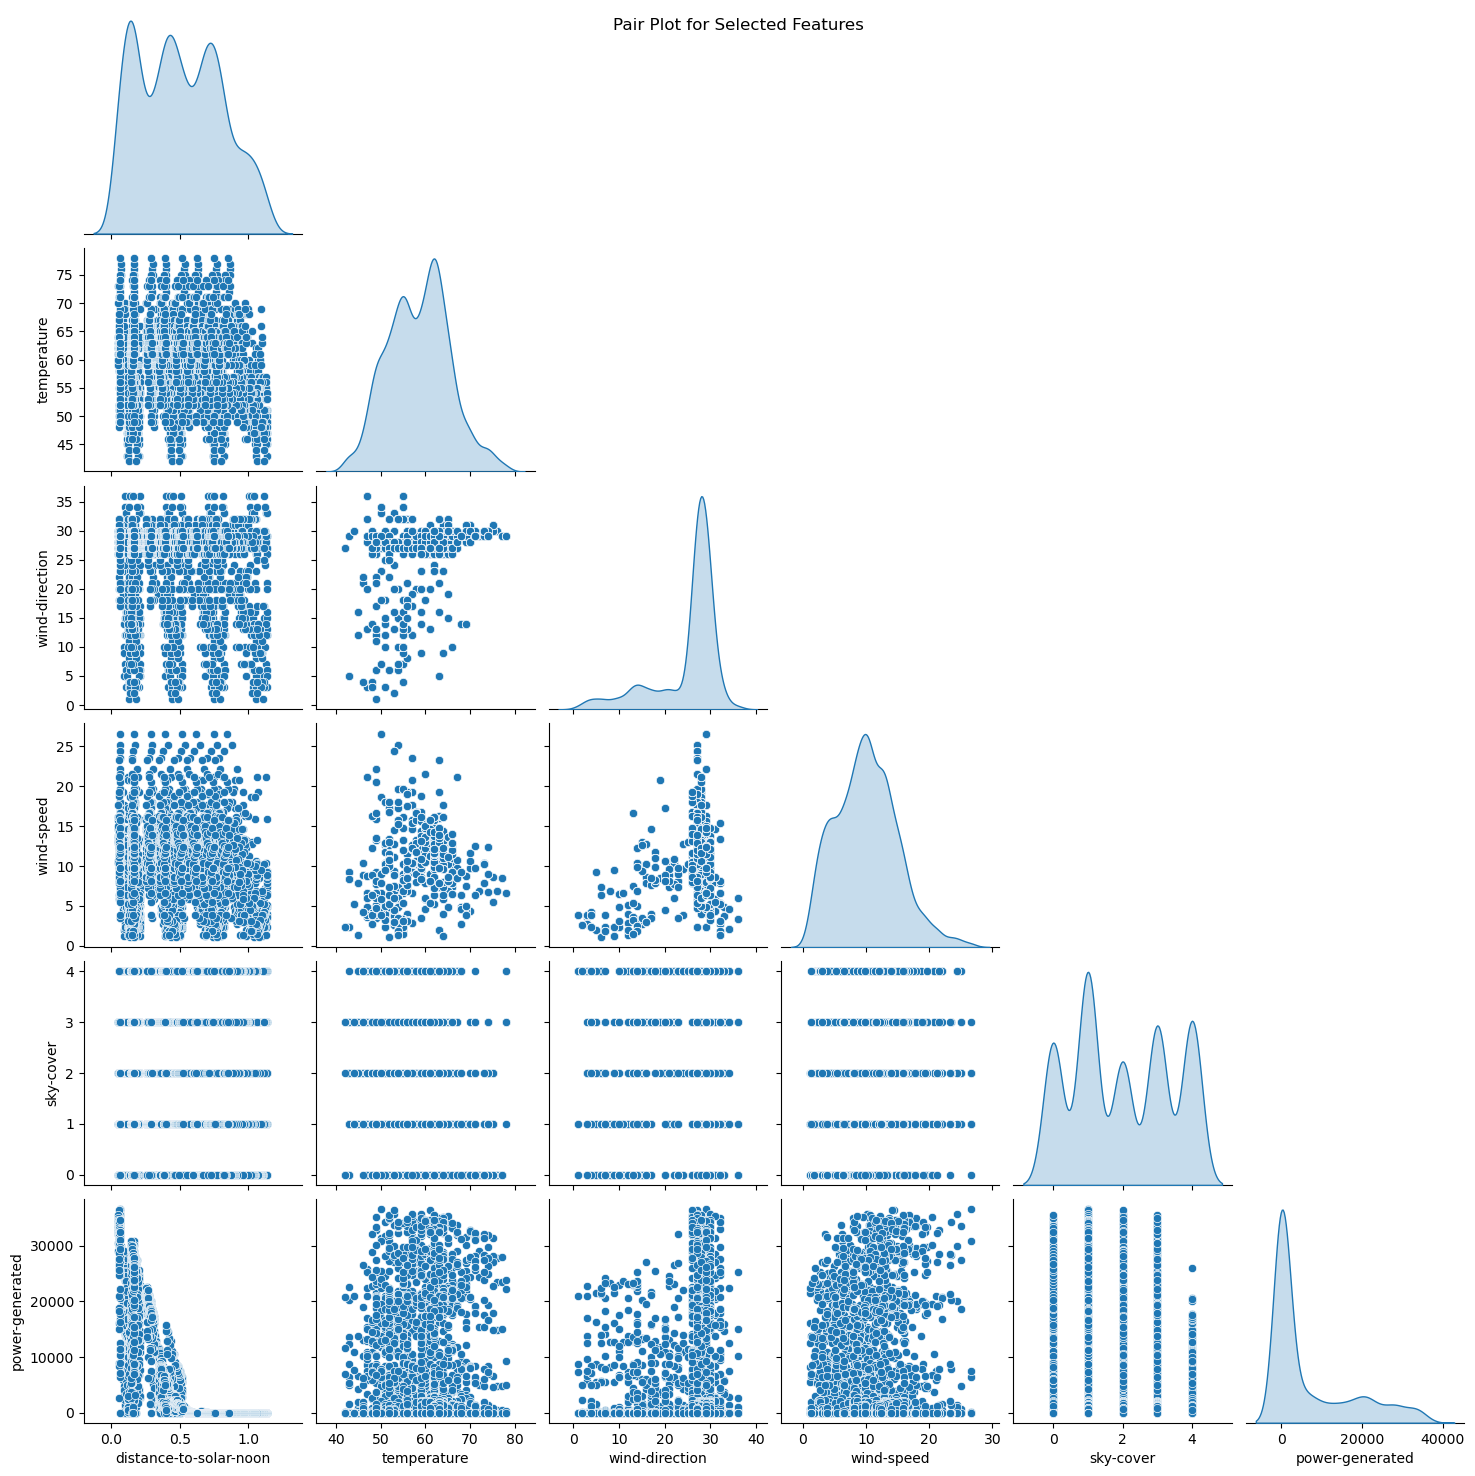

In [218]:
sns.pairplot(data[['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed', 'sky-cover','power-generated']],diag_kind='kde', corner=True)
plt.suptitle('Pair Plot for Selected Features')
plt.show()

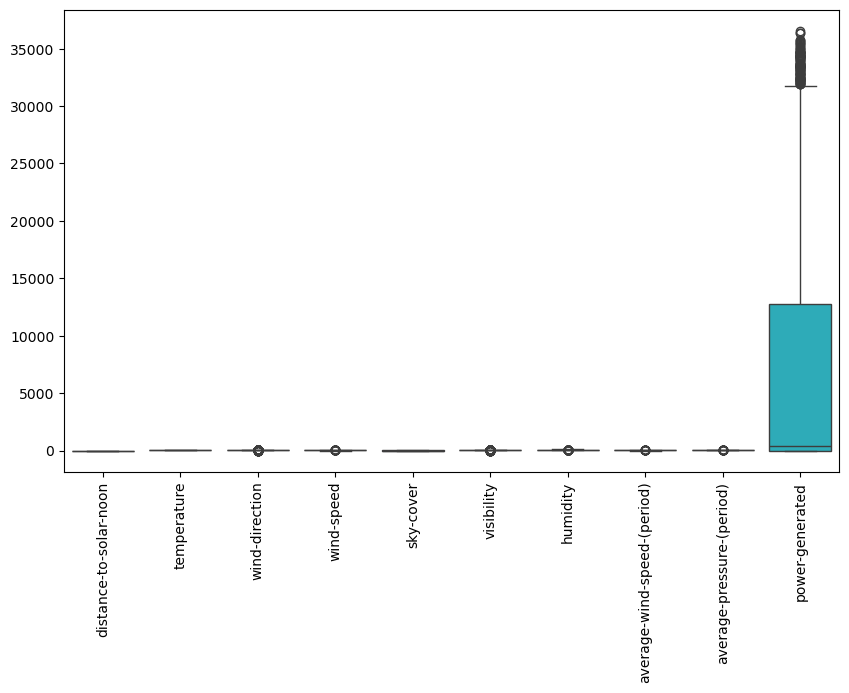

In [14]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

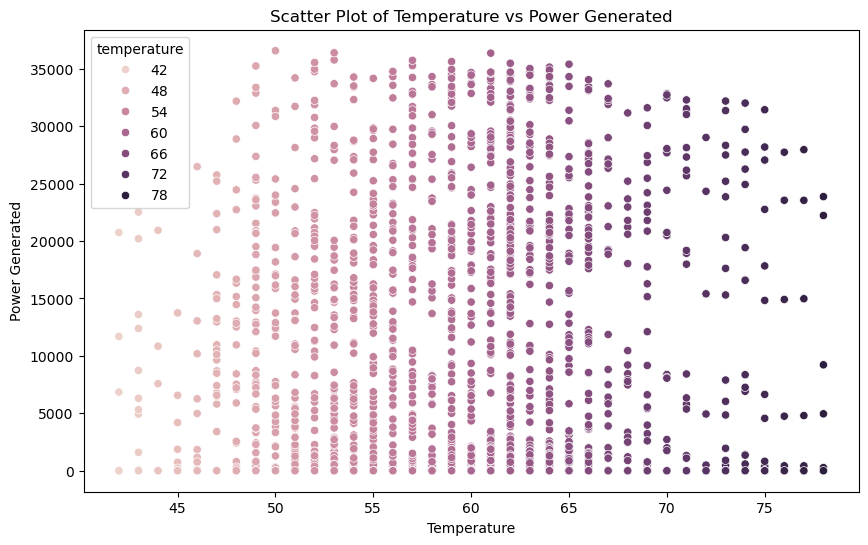

In [219]:
# Scatter plot of 'temperature' vs 'power generated'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='power-generated', data=data, hue='temperature')
plt.title('Scatter Plot of Temperature vs Power Generated')
plt.xlabel('Temperature')
plt.ylabel('Power Generated')
plt.show()

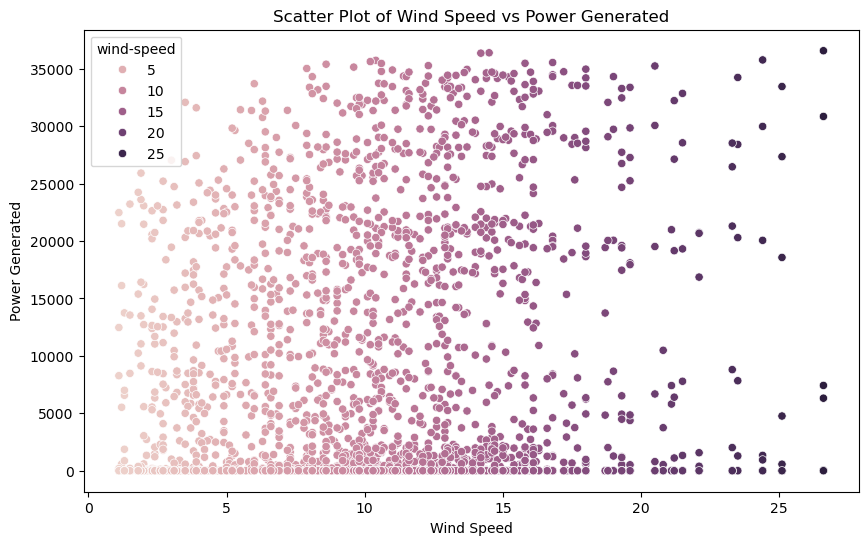

In [220]:
# Scatter plot of 'wind speed' vs 'power generated'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind-speed', y='power-generated', data=data, hue='wind-speed')
plt.title('Scatter Plot of Wind Speed vs Power Generated')
plt.xlabel('Wind Speed')
plt.ylabel('Power Generated')
plt.show()

In [18]:
corr_matrix = data.corr()
corr_matrix

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214891,0.082505,-0.746681
temperature,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054546,-0.435723,0.132193
wind-direction,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229844,-0.272405,0.146788
wind-speed,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673626,-0.379752,0.142641
sky-cover,-0.015184,-0.230672,-0.137140,0.107793,1.000000,-0.223523,0.394576,0.044301,-0.091512,-0.187236
visibility,0.065807,0.194110,0.203445,0.184778,-0.223523,1.000000,-0.291320,0.143621,-0.105345,0.076536
humidity,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,1.000000,-0.218042,0.018489,-0.522545
average-wind-speed-(period),-0.214891,0.054546,0.229844,0.673626,0.044301,0.143621,-0.218042,1.000000,-0.293457,0.278174
average-pressure-(period),0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293457,1.000000,-0.036771
power-generated,-0.746681,0.132193,0.146788,0.142641,-0.187236,0.076536,-0.522545,0.278174,-0.036771,1.000000


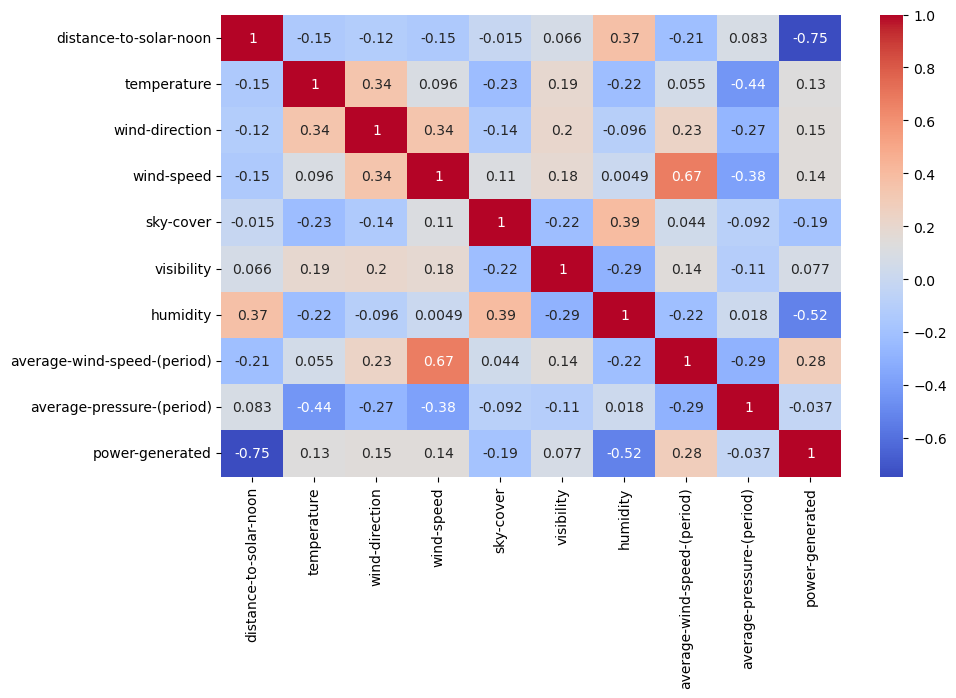

In [21]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

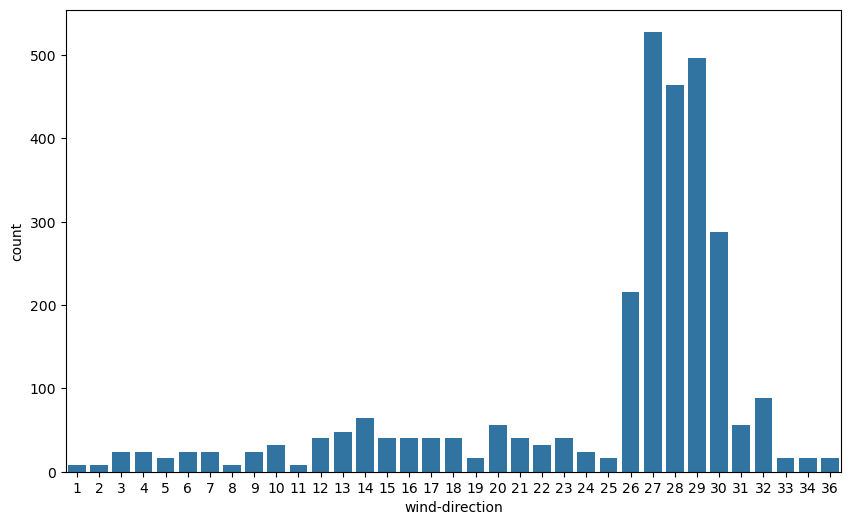

In [23]:
# Count plot
plt.figure(figsize=(10,6))
sns.countplot(x='wind-direction', data=data)
plt.show()

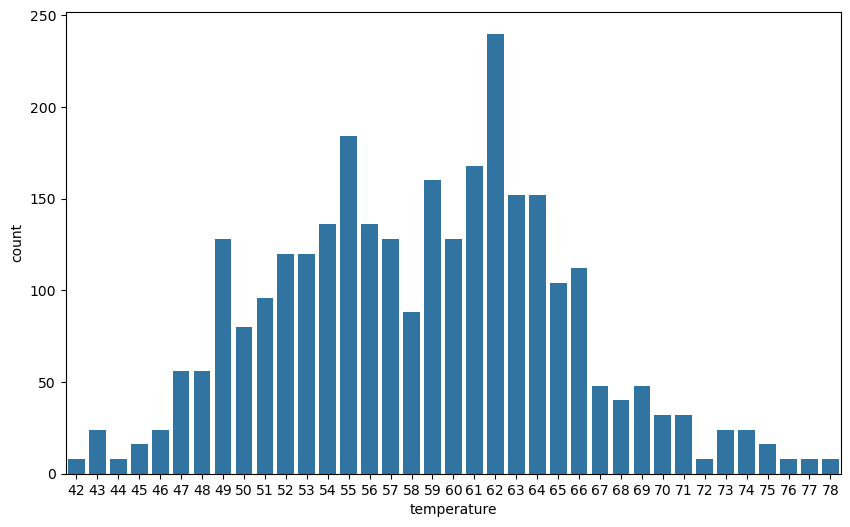

In [186]:
# Count plot
plt.figure(figsize=(10,6))
sns.countplot(x='temperature', data=data)
plt.show()

In [14]:
X = data.drop('power-generated', axis=1)
y = data['power-generated']

In [15]:
X

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [16]:
y

0           0
1           0
2        5418
3       25477
4       30069
        ...  
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: power-generated, Length: 2920, dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [19]:
X_test_scaled = scaler.transform(X_test)

## 1. linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize model
lr = LinearRegression()

# Fit model
LR_model = lr.fit(X_train_scaled, y_train)
LR_model

LinearRegression()

In [24]:
y_pred_lr = lr.predict(X_test_scaled).round()

In [25]:
df = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_lr})
df

,power-generated,Predictions
2437,21804,16814.0
2470,2065,10047.0
2359,0,5119.0
789,5654,6934.0
1642,3621,7694.0
...,...,...
2880,0,-4392.0
2295,0,1298.0
2222,1731,7814.0
1090,15,7301.0


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)  # mean squared error(logistic regression)
r2_lr = r2_score(y_test, y_pred_lr)             # R2 error


In [27]:
# Print evaluation metrics
print('Linear Regression - MSE : ', mse_lr)
print('Linear Regression - R2 : ' , r2_lr)

Linear Regression - MSE :  39495418.9880137
Linear Regression - R2 :  0.6250569378183906


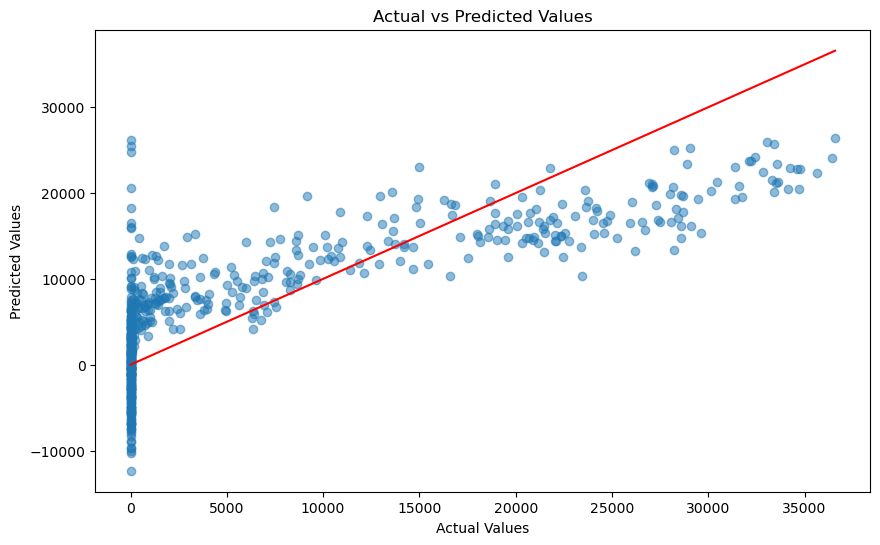

In [28]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 2. Random Forest 

In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

RF_model = rf.fit(X_train, y_train)
RF_model

RandomForestRegressor(random_state=42)

In [30]:
# Predict using Random Forest
y_pred_rf = rf.predict(X_test).round()

In [31]:
df1 = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_rf})
df1

,power-generated,Predictions
2437,21804,21196.0
2470,2065,2025.0
2359,0,0.0
789,5654,5820.0
1642,3621,2265.0
...,...,...
2880,0,0.0
2295,0,0.0
2222,1731,2171.0
1090,15,404.0


In [32]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_rf = r2_score(y_test, y_pred_rf)

In [33]:
print('Random Forest - MSE : ' ,mse_rf)
print('Random Forest - R2 : ' ,r2_rf)

Random Forest - MSE :  11610793.946917808
Random Forest - R2 :  0.889774896725662


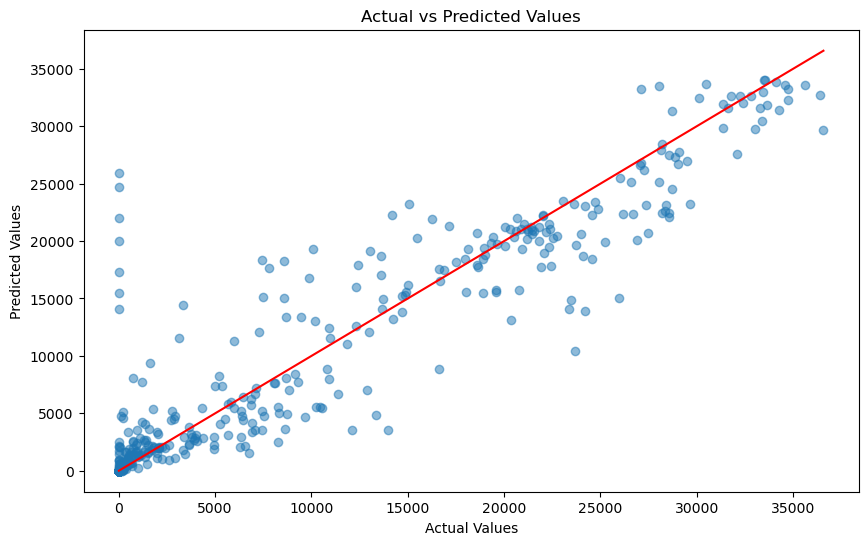

In [34]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 3. Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [36]:
# Make predictions
y_pred_gbr = gbr.predict(X_test).round()

In [37]:
df2 = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_gbr})
df2

,power-generated,Predictions
2437,21804,21344.0
2470,2065,2689.0
2359,0,-36.0
789,5654,2768.0
1642,3621,1588.0
...,...,...
2880,0,246.0
2295,0,-66.0
2222,1731,2482.0
1090,15,2048.0


In [38]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr).round()
r2_gbr = r2_score(y_test, y_pred_gbr)


In [39]:
print('Gradient Boosting - MSE : ', mse_gbr)
print('Gradient Boosting - R2 : ', r2_gbr)

Gradient Boosting - MSE :  10414549.0
Gradient Boosting - R2 :  0.9011312446742642


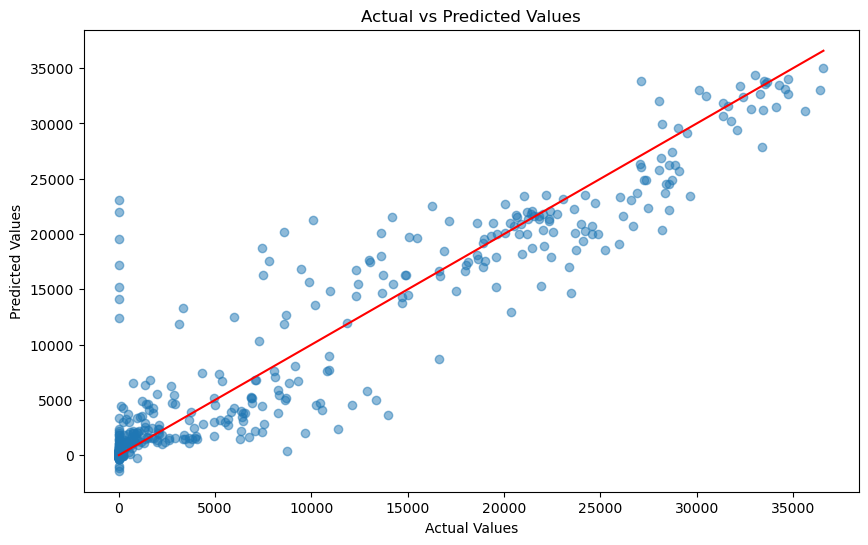

In [40]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 4. Support Vector Regression Model

In [41]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)


SVR()

In [42]:
# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test).round()


In [43]:
df3 = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_svr})
df3

,power-generated,Predictions
2437,21804,502.0
2470,2065,444.0
2359,0,439.0
789,5654,419.0
1642,3621,366.0
...,...,...
2880,0,354.0
2295,0,414.0
2222,1731,432.0
1090,15,367.0


In [44]:
# Calculate the Mean Squared Error (MSE)
mse_svr = mean_squared_error(y_test, y_pred_svr).round()

# Calculate the R2 score
r2_svr = r2_score(y_test, y_pred_svr)


In [45]:
# Print the results
print("Support Vector Regression - MSE: ",mse_svr)
print("Support Vector Regression - R2: ",r2_svr)

Support Vector Regression - MSE:  146403175.0
Support Vector Regression - R2:  -0.3898537115065943


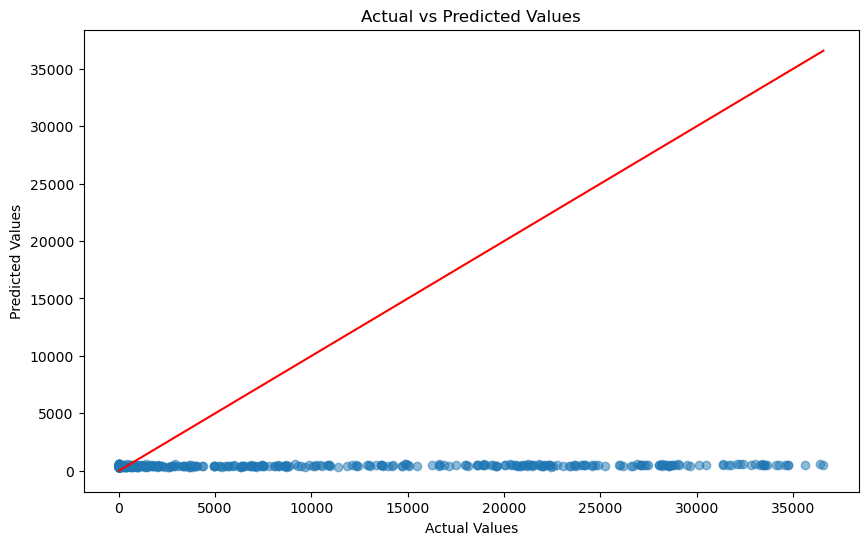

In [46]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 5. K Neighbors Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize and train the K-Nearest Neighbors model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [48]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

In [49]:
df4 = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_knn})
df4

,power-generated,Predictions
2437,21804,24350.8
2470,2065,13849.0
2359,0,573.6
789,5654,6990.2
1642,3621,1143.0
...,...,...
2880,0,0.0
2295,0,3188.4
2222,1731,5235.4
1090,15,7078.8


In [50]:
# Calculate the Mean Squared Error (MSE) and (R2)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


In [51]:
# Print the results
print("K-Nearest Neighbors - MSE: ",mse_knn)
print("K-Nearest Neighbors - R2: " ,r2_knn)

K-Nearest Neighbors - MSE:  55736138.96191781
K-Nearest Neighbors - R2:  0.4708784169905025


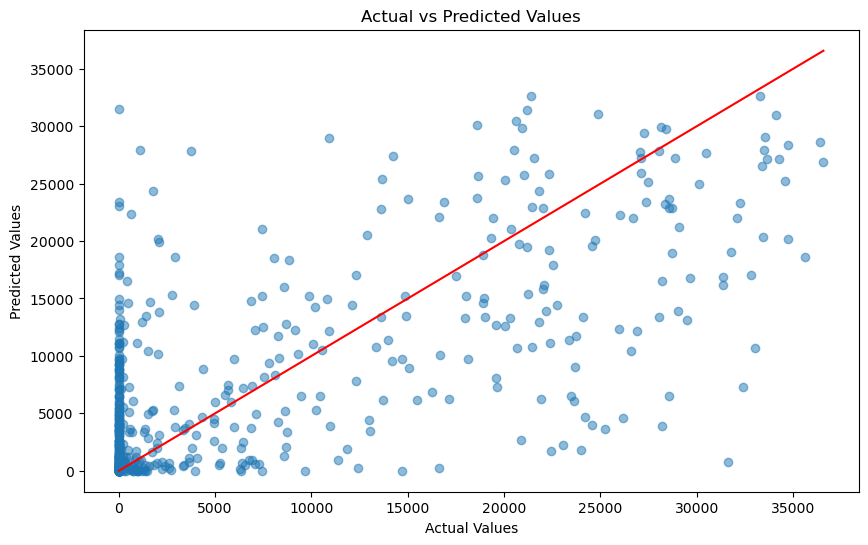

In [52]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 6. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT

DecisionTreeRegressor()

In [55]:
y_pred_DT = DT.predict(X_test)

In [56]:
df5 = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_DT})
df5

,power-generated,Predictions
2437,21804,21718.0
2470,2065,2026.0
2359,0,0.0
789,5654,10514.0
1642,3621,0.0
...,...,...
2880,0,0.0
2295,0,0.0
2222,1731,2137.0
1090,15,0.0


In [57]:
mse_DT = mean_squared_error(y_test, y_pred_DT)
r2_DT= r2_score(y_test, y_pred_DT)

In [58]:
print('Decision Tree - MSE : ', mse_DT)
print('Decision Tree - R2 : ' , r2_DT)

Decision Tree - MSE :  19247111.37157534
Decision Tree - R2 :  0.817280812288659


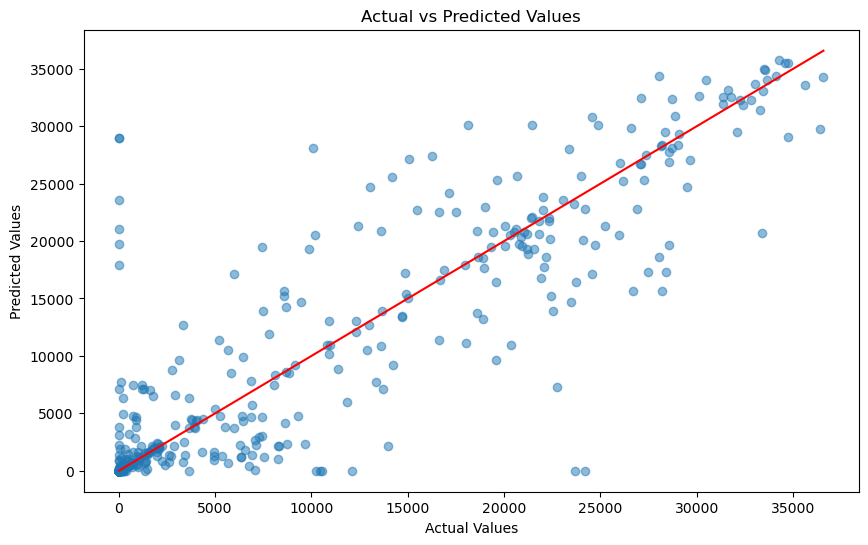

In [59]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_DT, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 7. XGB Regressor

In [60]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred_xgb = xgb_reg.predict(X_test).round()

In [62]:
df6 = pd.DataFrame({
              'power-generated':y_test,
              'Predictions':y_pred_xgb})
df6

,power-generated,Predictions
2437,21804,21311.0
2470,2065,2277.0
2359,0,-1.0
789,5654,5102.0
1642,3621,1304.0
...,...,...
2880,0,60.0
2295,0,-71.0
2222,1731,3014.0
1090,15,1602.0


In [63]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [64]:
print('XGB - MSE : ', mse_xgb)
print('XGB - R2 : ' , r2_xgb)

XGB - MSE :  10430172.232876712
XGB - R2 :  0.9009829163551331


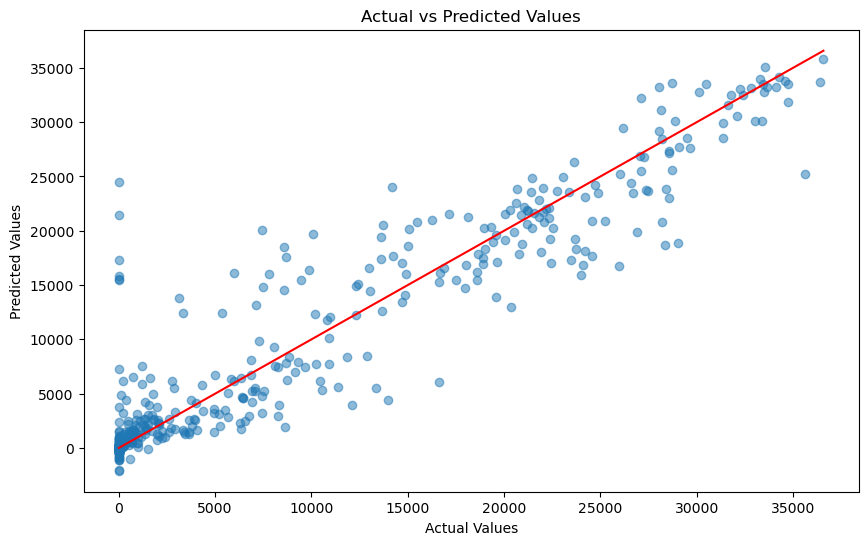

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Comparison of  models

In [66]:
print('Linear Regression - MSE : ', mse_lr)
print('Linear Regression - R2 : ' , r2_lr)
print('Random Forest - MSE : ' ,mse_rf)
print('Random Forest - R2 : ' ,r2_rf)
print('Gradient Boosting - MSE : ', mse_gbr)
print('Gradient Boosting - R2 : ', r2_gbr)
print("Support Vector Regression - MSE: ",mse_svr)
print("Support Vector Regression - R2: ",r2_svr)
print("K-Nearest Neighbors - MSE: ",mse_knn)
print("K-Nearest Neighbors - R2: " ,r2_knn)
print('Decision Tree - MSE : ', mse_DT)
print('Decision Tree - R2 : ' , r2_DT)
print('XGB - MSE : ', mse_xgb)
print('XGB - R2 : ' , r2_xgb)

Linear Regression - MSE :  39495418.9880137
Linear Regression - R2 :  0.6250569378183906
Random Forest - MSE :  11610793.946917808
Random Forest - R2 :  0.889774896725662
Gradient Boosting - MSE :  10414549.0
Gradient Boosting - R2 :  0.9011312446742642
Support Vector Regression - MSE:  146403175.0
Support Vector Regression - R2:  -0.3898537115065943
K-Nearest Neighbors - MSE:  55736138.96191781
K-Nearest Neighbors - R2:  0.4708784169905025
Decision Tree - MSE :  19247111.37157534
Decision Tree - R2 :  0.817280812288659
XGB - MSE :  10430172.232876712
XGB - R2 :  0.9009829163551331


In [67]:
model_result = pd.DataFrame({'MSE' : [mse_lr,mse_rf,mse_gbr,mse_svr,mse_knn,mse_DT,mse_xgb],
                   'R2' : [r2_lr,r2_rf,r2_gbr,r2_svr,r2_knn,r2_DT,r2_xgb]})     
model_result.index = ['LR','RF','GB','SVR','KNN','DT','XGB']
model_result

,MSE,R2
LR,3.949542e+07,0.625057
RF,1.161079e+07,0.889775
GB,1.041455e+07,0.901131
SVR,1.464032e+08,-0.389854
KNN,5.573614e+07,0.470878
DT,1.924711e+07,0.817281
XGB,1.043017e+07,0.900983


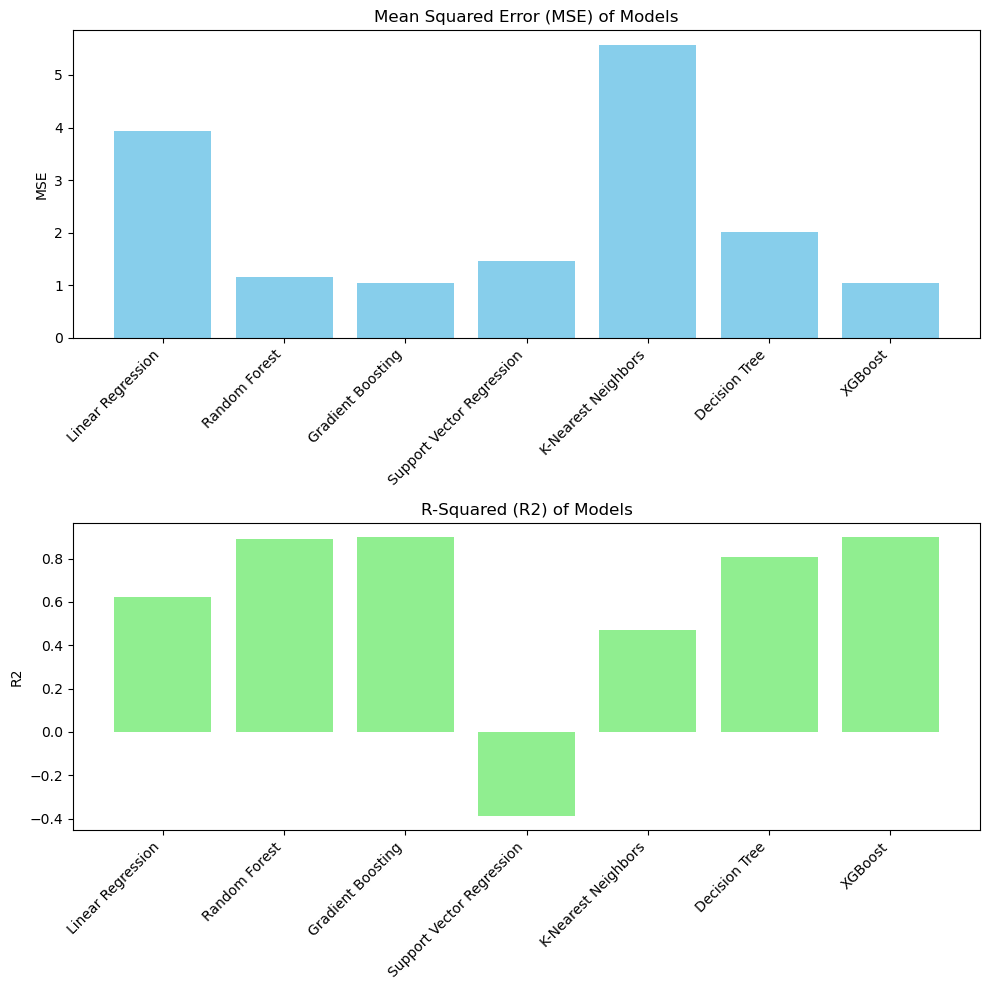

In [70]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 
              'Support Vector Regression', 'K-Nearest Neighbors', 'Decision Tree', 
              'XGBoost'],
    'MSE': [3.94,1.16,1.04,1.46,5.57,2.01,1.043], 
    'R2': [0.625057,0.889775,0.900899,-0.389854,0.470878,0.809139,0.9009]  
}

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Bar chart for MSE
ax[0].bar(results_df['Model'], results_df['MSE'], color='skyblue')
ax[0].set_title('Mean Squared Error (MSE) of Models')
ax[0].set_ylabel('MSE')
ax[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Bar chart for R2
ax[1].bar(results_df['Model'], results_df['R2'], color='lightgreen')
ax[1].set_title('R-Squared (R2) of Models')
ax[1].set_ylabel('R2')
ax[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')


plt.tight_layout()
plt.show()